In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
feature_id = 2
CONVERTED_DATABASE_NAME = '/home/ubuntu/HeLa_20KInt/HeLa_20KInt.sqlite'
SUMMED_REGIONS_DATABASE = '/home/ubuntu/HeLa_20KInt/HeLa_20KInt-features-{}-{}.sqlite'.format(feature_id, feature_id)

In [6]:
# get the feature's base peak id
db_conn = sqlite3.connect(SUMMED_REGIONS_DATABASE)
feature_list_df = pd.read_sql_query("select * from feature_list where feature_id={}".format(feature_id), db_conn)
db_conn.close()
if len(feature_list_df) > 0:
    base_peak_id = feature_list_df.iloc[0].base_peak_id.astype(int)
else:
    print("Empty feature list.")

In [7]:
base_peak_id

1

In [8]:
db_conn = sqlite3.connect(SUMMED_REGIONS_DATABASE)
feature_isotopes_df = pd.read_sql_query("select * from feature_isotopes where feature_id={}".format(feature_id), db_conn)
db_conn.close()

In [9]:
feature_isotopes_df

,feature_id,feature_region_peak_id,centroid_scan,centroid_rt,centroid_mz,peak_summed_intensity
0,2,1,574.123492,1085.746282,624.809083,3183248
1,2,2,574.343242,1086.135559,625.309056,2074436
2,2,3,573.666259,1085.080164,625.811608,525779
3,2,4,575.797795,1084.331235,626.311047,235182


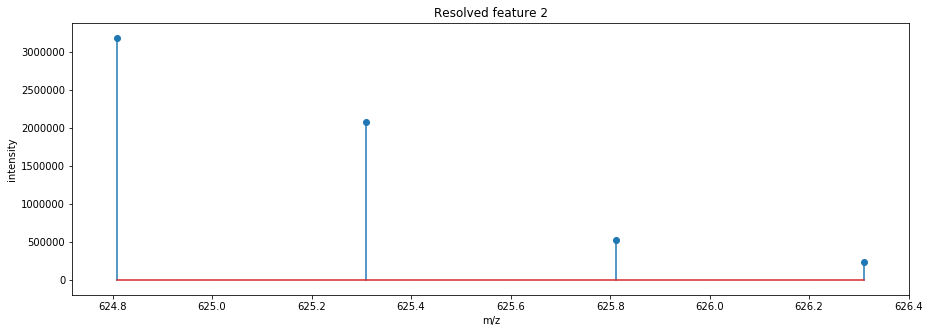

In [10]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
ax.stem(feature_isotopes_df.centroid_mz, feature_isotopes_df.peak_summed_intensity)
plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(15)
plt.margins(0.06)
plt.title('Resolved feature {}'.format(feature_id))
plt.show()